In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, patches, lines
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('./data1.csv', index_col=0)

In [6]:
def make_patient_chart(obs_number):
    fig = plt.figure(figsize=(16,8))
    # define axes
    ax_left = plt.subplot2grid((10,20), (2,0), rowspan=8, colspan=13)
    ax_right = plt.subplot2grid((10,20), (2,14), rowspan=8, colspan=6)
    ax_left_top = plt.subplot2grid((10,20), (0,4), rowspan=2, colspan=5)
    ax_right_top = plt.subplot2grid((10,20), (0,14), rowspan=2, colspan=6)
    # add data and format
    add_PCA_to_axis(ax_left, ['PCA1','PCA2','PCA3','PCA4','PCA5'], obs_number)
    add_delta_to_axis(ax_right, ['MD1','MD2','MD3','MD4','MD5'], obs_number)
    format_axis(ax_left, -3, 3)
    format_axis(ax_right, -.3,.3)
    add_left_header(ax_left_top, 'gold', 'cornflowerblue')
    add_right_header(ax_right_top, obs_number)
    return fig
    
def add_PCA_to_axis(axis, list_of_PCAs, obs_number):
    # get the data from the data frame, can probably use numpy to reduce overhead
    all_data = [df[pca].values for pca in reversed(list_of_PCAs)]
    person_data = [df[df['Obs']==obs_number][pca].values for pca in reversed(list_of_PCAs)]
    color1 = 'gold'
    color2 = 'cornflowerblue'
    # create a set of properties to pass to the box-whisker plot.  for some reason, using 'boxprops=' 
    # ignores 'patch_artist=True', so the box properties are set later.
    flier_props = dict(marker='o', markerfacecolor=color2, markersize=6, markeredgecolor='none')
    whisker_props = dict(color='gray', linestyle='solid')
    median_props = dict(linewidth=3, color='navy', solid_capstyle='butt')
    
    # create the b-w plot
    box_plot_dict = axis.boxplot(all_data, sym='o', vert=False, whis=1.5, widths=.2, positions=np.arange(1,6),
                                 patch_artist=True, flierprops=flier_props,
                                 medianprops=median_props, whiskerprops=whisker_props)
    # modify the box properties
    for box in box_plot_dict['boxes']:
        plt.setp(box, color=color2, linestyle=None, alpha=0.8, linewidth=0)
    # add the individual's data to the plot
    y_pos = np.arange(1.1,6.1)
    #for per_dat in person_data:
    axis.barh(left=None, width=person_data, bottom=y_pos, height=0.2, color=color1,
              edgecolor=None, linewidth=0, hatch='//')
    axis.yaxis.tick_left()
    axis.set_yticks(np.arange(1,6))
    #axis.set_yticklabels(reversed(list_of_PCAs))
    
def add_delta_to_axis(axis, list_of_deltas, obs_number):
    y_pos = np.arange(0.9,5.9)
    data = [df[df['Obs']==obs_number][delta].values for delta in reversed(list_of_deltas)]
    axis.barh(left=None, width=data, bottom=y_pos, height=0.4, color='purple',
              edgecolor=None, linewidth=0)
    axis.yaxis.tick_right()
    axis.set_yticks(np.arange(1,6))
    #axis.set_yticklabels(reversed(list_of_deltas))
    
def format_axis(axis, xmin, xmax):
    axis.set_frame_on(False)
    axis.set_xlim(left=xmin, right=xmax)
    axis.set_xticks(np.linspace(xmin, xmax, 7))
    axis.xaxis.tick_top()
    axis.set_ylim(0.5,5.6,auto=False)
    axis.axvline(x=0, color='black')
    axis.axhline(y=5.6, color='lightgray')
    tick_font = font_manager.FontProperties(family=['Calibri'], style='normal', 
                                             size=12, weight='normal', stretch='normal')
    for tick_label in axis.get_xticklabels():
        tick_label.set_fontproperties(tick_font)
    for tick_line in axis.yaxis.get_ticklines():
        tick_line.set_color('none')

def add_left_header(axis, color1, color2):
    # add positions of the lower left corners of each color patch
    x0 = -0.6
    y0 = 0.65
    x1 = -0.6
    y1 = 0.35
    dx = 0.36
    dy = 0.15
    axis.set_frame_on(False)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlim(-1, 1, auto=False)
    axis.set_ylim(0, 1, auto=False)
    outer_rect = patches.Rectangle(xy=(-1, 0.2), width=1.99, height=0.8, fill=False)
    axis.add_patch(outer_rect)
    legend_patches = [patches.Rectangle(xy=(x0, y0), width=dx, height=dy, 
                        facecolor=color1, edgecolor='black', hatch='//', linewidth=0),
                      patches.Rectangle(xy=(x1, y1), width=dx, height=dy, facecolor=color2, linewidth=0)]
    for p in legend_patches:
        axis.add_patch(p)
    w_dx = 0.06
    axis.plot([x1, x1-w_dx],[y1+dy/2, y1+dy/2], 'k-')
    axis.plot([x1-w_dx, x1-w_dx],[y1+dy/5, y1+4/5*dy], 'k-')
    axis.plot([x1+dx, x1+dx+w_dx],[y1+dy/2, y1+dy/2], 'k-')
    axis.plot([x1+dx+w_dx, x1+dx+w_dx],[y1+dy/5, y1+4/5*dy], 'k-')
    axis.annotate(s='Patient', xy=(.1, y0+0.03), fontsize=12 )
    axis.annotate(s='Population', xy=(.1, y1+0.03), fontsize=12 )
    
def add_right_header(axis, obs_number):
    mortality = 100*df['MortalityProb'][df['Obs']==obs_number].values
    axis.set_frame_on(False)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlim(-1, 1, auto=False)
    axis.set_ylim(0, 1, auto=False)
    outer_rect = patches.Rectangle(xy=(-.75, 0.2), width=1.5, height=0.8, fill=False)
    axis.add_patch(outer_rect)
    axis.annotate(s='Mortality Probability:', xy=(0, 0.7), fontsize=12, horizontalalignment='center')
    mort_prob_string = '%.1f%%' %mortality
    axis.annotate(s=mort_prob_string, xy=(0, 0.4), fontsize=24, horizontalalignment='center', color='red')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Calibri'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


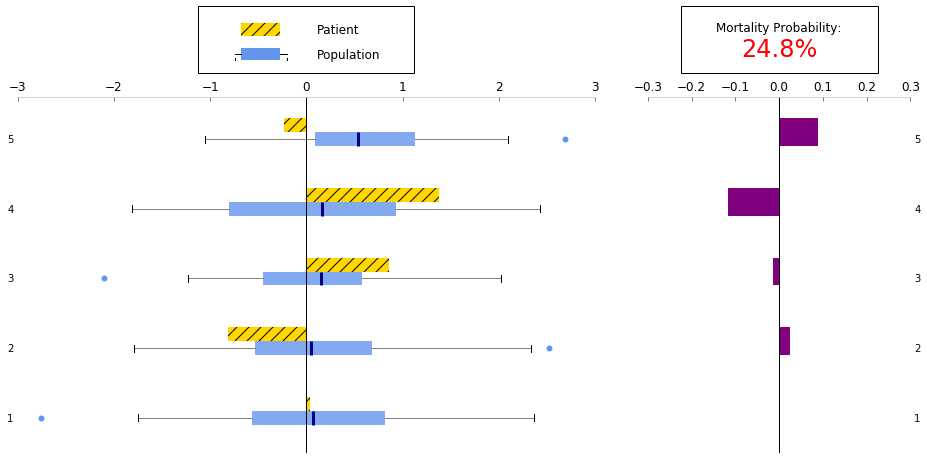

In [7]:
fig = make_patient_chart(obs_number=3)

In [10]:
fig.savefig('./pca.svg')

In [ ]:
fig.